In [1]:
import pandas as pd
import numpy as np

In [2]:
## Reading the dataset
df = pd.read_csv('survey_results_public.csv')

In [4]:
df.shape
## data has 88883 rows and 85 columns

(88883, 85)

In [6]:
## Regex to filter data professionals, less than 1 year  of professional coding experience
import re

In [7]:
junior_data = df[(df['YearsCodePro']=='Less than 1 year')&(df['DevType'].str.contains("data\s|\sdata$|\sdata\s",flags=re.IGNORECASE,regex=True).fillna(value=False))]

In [25]:
senior_data = df[~(df['YearsCodePro']=='Less than 1 year')&~(df['DevType'].str.contains("data\s|\sdata$|\sdata\s",flags=re.IGNORECASE,regex=True).fillna(value=False))]

In [8]:
## list of possible values of 'DevType'- developer type
possible_vals = ['Academic researcher','Data or business analyst','Data scientist or machine learning specialist','Database administrator',
'Designer','Developer, back-end','Developer, desktop or enterprise applications','Developer, embedded applications or devices','Developer, front-end',
'Developer, full-stack',
'Developer, game or graphics Developer, mobile',
'Developer, QA or test',
'DevOps specialist',
'Educator',
'Engineer, data',
'Engineer, site reliability','Engineering manager',
'Marketing or sales professional','Product manager',
'Scientist','Senior Executive (C-Suite, VP, etc.)','Student','System administrator','Other']

In [9]:
## Function to count the number of responses of each DevType
def total_count(df,col1,col2,lookfor):
    from collections import defaultdict
    new_df = defaultdict(int)
    for val in possible_vals:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val]+= int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1,col2]
    new_df.sort_values('Count',ascending = False, inplace = True)
    return new_df

In [10]:
datatype = junior_data['DevType'].value_counts().reset_index()

In [11]:
datatype.rename(columns = {'index':'DevType','DevType':'Count'},inplace=True)

In [12]:
datatype.head()

,DevType,Count
0,Data scientist or machine learning specialist,43
1,Data or business analyst,42
2,"Engineer, data",22
3,Data or business analyst;Data scientist or mac...,16
4,Data scientist or machine learning specialist;...,11


In [14]:
## dataframe created to represent the count of each devtypes
datatype_df = total_count(datatype,'DevType','Count',possible_vals)

In [15]:
## Adding percentage of each roles present
datatype_df['perc'] = datatype_df['Count']/558

In [16]:
datatype_df

,DevType,Count,perc
2,Data scientist or machine learning specialist,299,0.535842
1,Data or business analyst,283,0.507168
5,"Developer, back-end",209,0.374552
13,"Engineer, data",167,0.299283
9,"Developer, full-stack",161,0.288530
19,Student,144,0.258065
8,"Developer, front-end",133,0.238351
0,Academic researcher,112,0.200717
6,"Developer, desktop or enterprise applications",82,0.146953
3,Database administrator,80,0.143369


### Who are these Junior Data Professionals?

In [21]:
import seaborn as sns

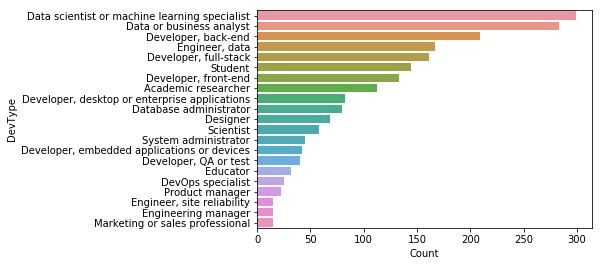

In [24]:
sns.barplot(x= datatype_df['Count'], y= datatype_df['DevType'])

#### Majority of them identify themselves as DataScientist or Machine Learning Specialist which is about 54 percent. About 51 percent as Data or Business Analyst. About 2 pecent of the respondents also identifed themselves as Marketing or Sales professional  and was the lowest among the responses. 

### Does the Junior Data Professional work longer on average compared to the total average number of working hours per week?

In [43]:
## mean hours for a junior data pro
junior_data['WorkWeekHrs'].mean()

38.86727688787185

In [29]:
## mean hours for a senior data pro
senior_data['WorkWeekHrs'].mean()

42.15981877335889

On average Junior Data Professional works 3.25 hours less than the general average

### What is the average salary of a Junior Data Professional?

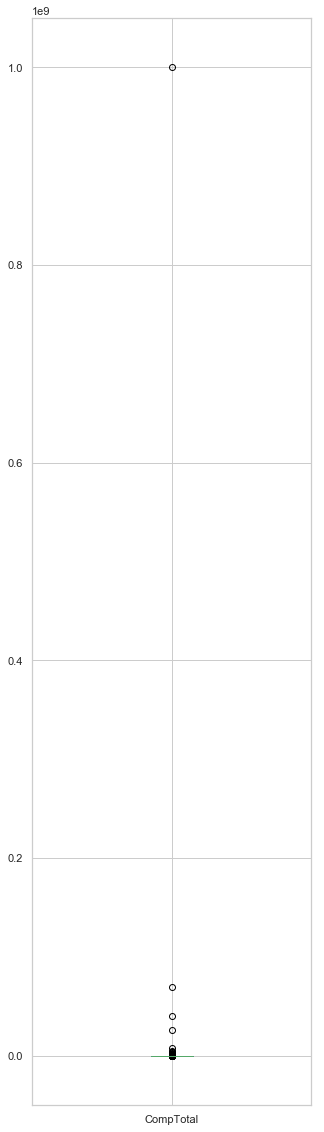

In [62]:
## Box plot reveals the skew and outliers
junior_data.boxplot(column ='CompTotal',figsize=(5,20))

In [24]:
## Mean value of tge Total Compensation
junior_data['CompTotal'].mean()

3192505.914438503

In [25]:
## Median Value
junior_data['CompTotal'].median()

37400.0

In [41]:
## Max value of Total Compensation
junior_data['CompTotal'].max()

1000000000.0

In [27]:
## using median to fill the na values
junior_data.loc[:,'CompTotal'] = junior_data['CompTotal'].fillna(junior_data['CompTotal'].median())

/Users/kavitasreejithpillai/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [39]:
## creating dataframe without outliers for Total Compensation
junior_data_CompTotal_out = junior_data[junior_data['CompTotal'].between(junior_data['CompTotal'].quantile(.15), junior_data['CompTotal'].quantile(.75))]

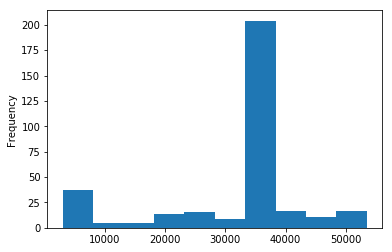

In [35]:
## Distribution the total compensation variable
junior_data_CompTotal_out['CompTotal'].plot(kind='hist')

In [38]:
## list of all possible values for LanguagesWorkedWith variable
possible_vals_tech = ['Assembly','Bash/Shell/PowerShell', 'C','C++','C#','Clojure Dart Elixir Erlang','F#',
                      'Go','HTML/CSS','Java','JavaScript','Kotlin','Objective-C','PHP',
                      'Python','R','Ruby','Rust','Scala','SQL','Swift','TypeScript','VBA','WebAssembly']

In [56]:
techtype = junior_data_CompTotal_out['LanguageWorkedWith'].value_counts().reset_index()

In [57]:
techtype.head()

,index,LanguageWorkedWith
0,Python,9
1,Python;SQL,8
2,Python;R;SQL,6
3,HTML/CSS;JavaScript;Python;SQL,5
4,Python;R,5


In [58]:
techtype.rename(columns = {'index':'skill','LanguageWorkedWith':'Count'},inplace=True)

In [59]:
techtype.head()

,skill,Count
0,Python,9
1,Python;SQL,8
2,Python;R;SQL,6
3,HTML/CSS;JavaScript;Python;SQL,5
4,Python;R,5


In [60]:
## Function to count the responses for each skill
from collections import defaultdict
new_df = defaultdict(int)
for each in possible_vals_tech:
    for idx in range(techtype.shape[0]):
        if each in techtype['skill'][idx]:
            ##print(each + str(idx))
            new_df[each]+=int(techtype['Count'][idx])
new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
new_df.columns = ['skill','Count']
new_df.sort_values('Count',ascending = False, inplace = True)            
        
print(new_df)            
   
    

                    skill  Count
12                 Python    168
2                       C    140
17                    SQL    127
7                    Java    122
6                HTML/CSS    105
8              JavaScript     93
1   Bash/Shell/PowerShell     70
13                      R     57
3                     C++     46
4                      C#     43
11                    PHP     32
19             TypeScript     28
20                    VBA     17
16                  Scala     11
0                Assembly     11
9                  Kotlin      9
18                  Swift      8
14                   Ruby      6
5                      Go      6
10            Objective-C      3
15                   Rust      2
21            WebAssembly      1


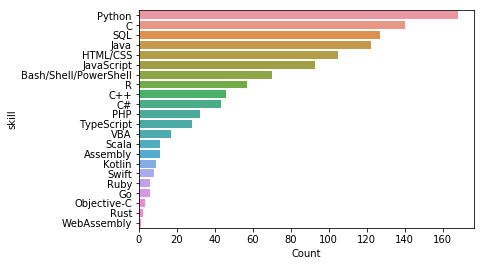

In [61]:
## Bar char to represent the skill sets
sns.barplot(x= new_df['Count'], y= new_df['skill'])

In [99]:
junior_data_CompTotal_out_high = junior_data_CompTotal_out[junior_data_CompTotal_out['CompTotal']>35000]

In [111]:
junior_data_CompTotal_out_high['MgrIdiot'].value_counts()

Somewhat confident        68
Very confident            64
Not at all confident      20
I don't have a manager     8
Name: MgrIdiot, dtype: int64

In [102]:
from collections import defaultdict
new_df = defaultdict(int)
for each in possible_vals_tech:
    for idx in range(techtype_high.shape[0]):
        if each in techtype_high['type'][idx]:
            ##print(each + str(idx))
            new_df[each]+=int(techtype_high['Count'][idx])
new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
new_df.columns = ['type','Count']
new_df.sort_values('Count',ascending = False, inplace = True)            
        
print(new_df)   

                     type  Count
2                       C    160
13                 Python    155
8                    Java    138
7                HTML/CSS    116
18                    SQL    114
9              JavaScript    106
1   Bash/Shell/PowerShell     71
3                     C++     67
14                      R     54
12                    PHP     46
4                      C#     44
20             TypeScript     25
0                Assembly     24
21                    VBA     16
10                 Kotlin     11
17                  Scala     10
11            Objective-C      8
15                   Ruby      7
19                  Swift      6
16                   Rust      5
6                      Go      5
22            WebAssembly      4
5                      F#      3


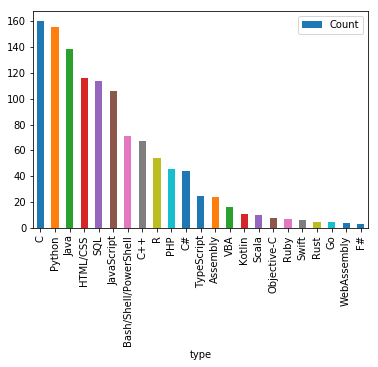

In [104]:
new_df.plot.bar(x='type',y='Count')

In [94]:
junior_data_CompTotal_out['CompTotal'].median()

37400.0

In [49]:
techtype_df = total_count(techtype,'type','Count',possible_vals_tech)

In [149]:
df_CompTotal_out[df_CompTotal_out['CompTotal']>60000]['LanguageWorkedWith']

0                          HTML/CSS;Java;JavaScript;Python
1                                      C++;HTML/CSS;Python
3                                      C;C++;C#;Python;SQL
4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
6                                      HTML/CSS;JavaScript
7        Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
10                                               Other(s):
11        Bash/Shell/PowerShell;HTML/CSS;Java;Python;R;SQL
14       Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;...
20       Assembly;Bash/Shell/PowerShell;C;C++;Go;Java;J...
22       Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...
26               C++;JavaScript;Python;Ruby;SQL;TypeScript
27                                   JavaScript;TypeScript
30                                                  Python
33                                     HTML/CSS;JavaScript
34                                     HTML/CSS;JavaScript
36       Bash/Shell/PowerShell;JavaScript;Python;Other(s

In [95]:
junior_data['CompTotal'].dtype

dtype('float64')

### How many years of code experience Junior data professional had?

In [63]:
junior_data_CompTotal_out['YearsCode'].value_counts()/junior_data_CompTotal_out.shape[0]

2                   0.165179
3                   0.120536
5                   0.120536
4                   0.107143
6                   0.102679
1                   0.093750
Less than 1 year    0.080357
7                   0.066964
8                   0.049107
9                   0.031250
10                  0.026786
12                  0.008929
14                  0.008929
15                  0.008929
19                  0.004464
13                  0.004464
Name: YearsCode, dtype: float64

In [64]:
0.165179+0.120536+0.120536+0.107143+0.102679+0.093750

0.709823

### About 71 percent of the respondents had 1-6 years of coding experience